History:
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Surprisingly, we can make very accurate predictions on which passengers would survive by analyzing the probability of survival based on a few attributes such as gender, age, and social status. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about society's priorities and privileges at the time.

### Titanic survivors


The Goal: Predict whether a passenger survived or not. 0 for not surviving, 1 for surviving.

Importing libraries for analysis

In [2]:
#numpy is used for numerical computations
import numpy as np
#pandas is used for data processing
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#pickle used to load data file
import pickle
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

### DATA COLLECTION

Data can be in any form.

Types of data:

-Structured data:nominal/categorical,numerical,ordinal,time-series

-Unstructured data

### Load Dataset

In [4]:
#loading the titanic datasets
file_name = 'C:\\Users\\acer\\Desktop\\Exploratory-Data-Analysis\\data\\Titanic-Train-Data.csv'
data_set = pd.read_csv(file_name)
df=data_set.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


There are 12 Columns:

PassengerId — Id of every Passenger

Survived — 1 is for who survived and 0 for passenger who died

Pclass — Socioeconomic status(1 — Upper class, 2 — Middle class, 3 — Lower class)

Name — Passenger’s name

Sex — Gender of Passenger

Age — Age of Passenger


SibSp — Number of Siblings/spouse of the passenger abroad titanic

Parch — Number of parents/children of the passenger abroad titanic

Ticket — Ticket number of every passenger

Fare — Fare spend by passenger

Cabin — Cabin number of passenger

Embarked — Port of embarkation of passenger(C — Cherbourg, Q — Queenstown, S — Southampton)

In [5]:
#shape and size of the dataset
print('shape of the data frame: ',df.shape)
print('size of the data frame: ',df.size)
print('type of data frame',type(df))
df.dtypes

shape of the data frame:  (891, 12)
size of the data frame:  10692
type of data frame <class 'pandas.core.frame.DataFrame'>


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.sample() #sample function takes the number of samples from the data set 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
236,237,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0,NaN,S


In [155]:
#describe function gives the statstical information of the data frame
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [156]:
#info function gives the information of the non null data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#numerical variables in our datasets
num_var = [i for i in df.columns if df[i].dtypes!='O']
num_var
# for i in range(len(num_var)):
#     sns.histplot(num_var[i])
#     plt.show()

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [158]:
#categorical variables in our datasets
for c in df.columns:
    if df[c].dtypes=='O':
        print(c)

Name
Sex
Ticket
Cabin
Embarked


### DATA PREPROCESSING


Data Preparation steps:

-Renaming the columns

-Univariate analysis

-Finding data types of columns

-Missing values treatment

-dropping the duplicate rows

-bivariate analysis

-dropping irrelevant columns

-variable transformation

-dropping the missing or null values

-multivariate analysis

-detecting outliers

-feature creation

### Handling Missing Values

In [159]:
#isnull function checks the null values in the data set
df.isnull().mean()  #sum()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [160]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

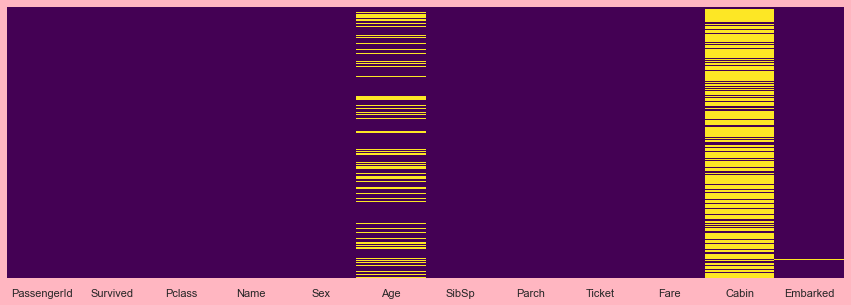

In [161]:
#finding the null values using heat map
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

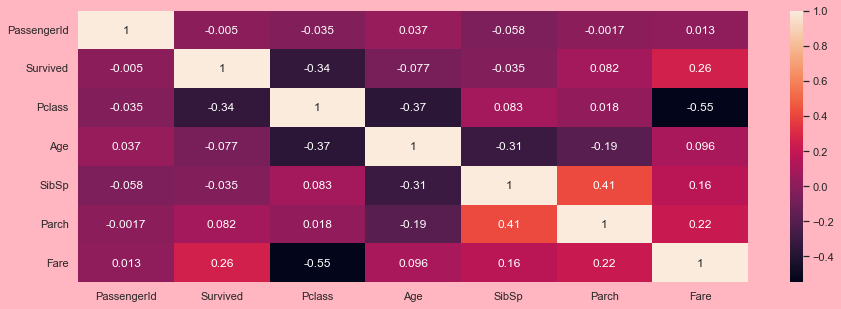

In [162]:
#heatmap helps us to know the relationship between the variables
plt.figure(figsize=(15,5))
sns.set(rc={'figure.facecolor':'lightgreen'})#axes.facecolor
sns.heatmap(df.corr(), annot=True)

Here we can see that Parch and SibSp has a higher correlation, which generally makes sense since Parents are more likely to travel with their multiple kids and spouses tend to travel together.

Passenger class has a lower relationship with the target variable.

from heatmap, can see the relationship between the variables

In [163]:
df.corr(method='pearson')#checks the relationships

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [164]:
#compare survival rates across the numeric variables
pd.pivot_table(df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


 - The average age of survivors is 28, so young people tend to survive more.

 - People who paid higher fare rates were more likely to survive, more than double. 

 - If you have parents, you had a higher chance of surviving. 

 - if you are a child, and have siblings, you have less of a chance of surviving

In [165]:
#analysis of the target variable
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [166]:
df.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='Density'>

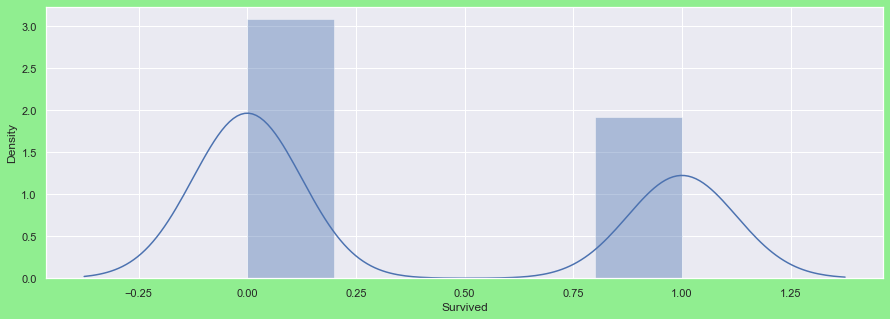

In [167]:
f=plt.figure(figsize=(15,5))
sns.set(rc={'figure.facecolor':'lightpink'})
sns.distplot(df['Survived'])

Survived: Most of the people died in the shipwreck, only around 200 people survived.

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

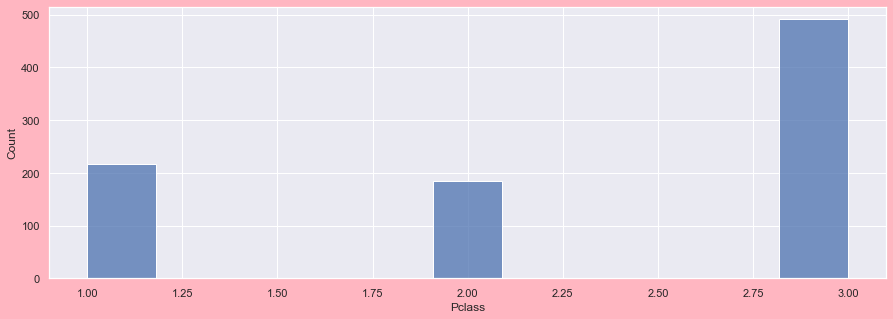

In [168]:
plt.figure(figsize=(15,5))
sns.histplot(df['Pclass'])

Pclass: The majority of the people traveling, had tickets to the 3rd class.

<AxesSubplot:xlabel='Sex', ylabel='Count'>

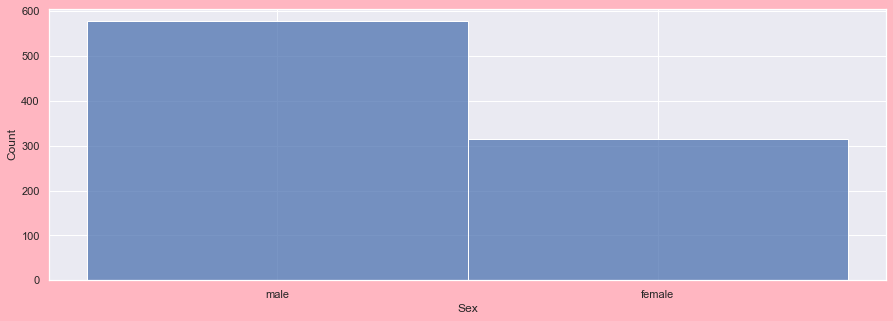

In [169]:
plt.figure(figsize=(15,5))
sns.histplot(df['Sex'])

Sex: There were more males than females aboard the ship, roughly double the amount.

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

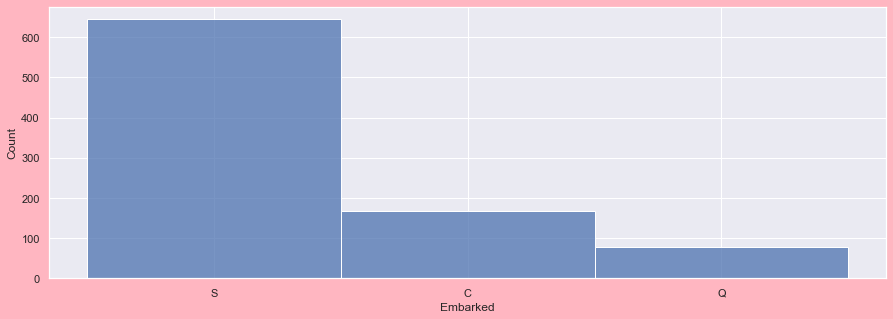

In [170]:
plt.figure(figsize=(15,5))
sns.histplot(data=df['Embarked'])

Embarked: Most of the passengers boarded the ship from Southampton.

<AxesSubplot:xlabel='Cabin', ylabel='Count'>

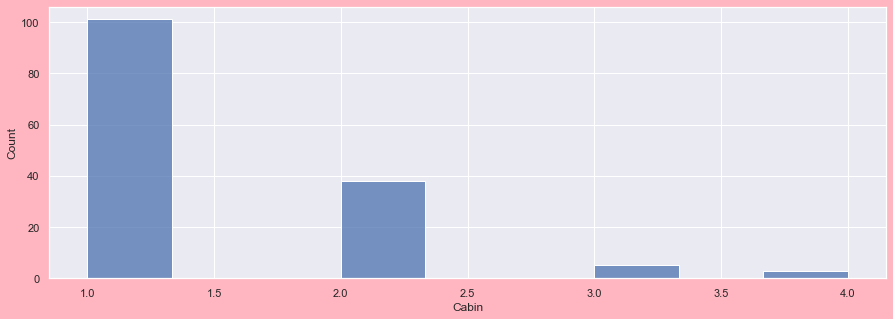

In [171]:
plt.figure(figsize=(15,5))
sns.histplot(df['Cabin'].value_counts())

<AxesSubplot:xlabel='Cabin', ylabel='Count'>

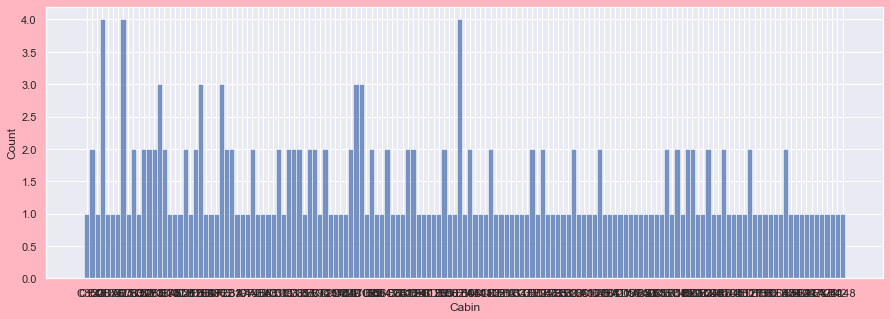

In [172]:
plt.figure(figsize=(15,5))
sns.histplot(df['Cabin'])

In [173]:
print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass',values = 'Ticket' ,aggfunc ='count'))
print('----------------')
print(pd.pivot_table(df, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print('----------------')
print(pd.pivot_table(df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
----------------
Sex       female  male
Survived              
0             81   468
1            233   109
----------------
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


Pclass: more people survived from the First class than the Second or the Third class, even though the total number of passengers in the First class was much much less than the Third class. Thus our previous assumption that the rich survived is confirmed here, which might be relevant to model building.

Sex: Most of the women survived, and the majority of the male died in the shipwreck. 

Embarked: This doesn’t seem much relevant, maybe if someone was from “Cherbourg” had a higher chance of surviving.

<AxesSubplot:>

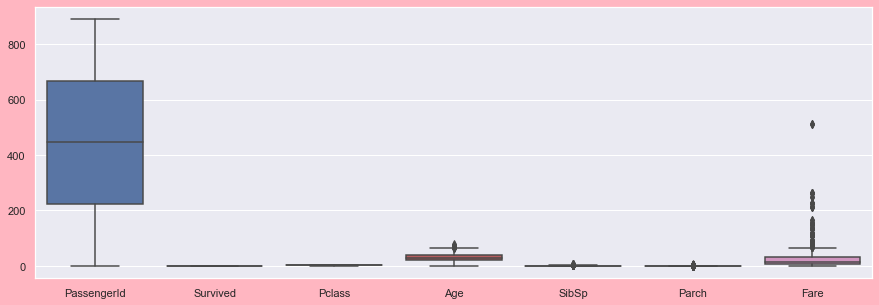

In [174]:
#checking the outliers in the dataset
plt.figure(figsize=(15,5))
sns.boxplot(data=df)

In [175]:
#detecting the outliers
q1=df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].quantile(0.25)
q3=df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].quantile(0.75)
iqr=q3-q1 # difference between maximum and minimum

upper_limit=q3+1.5*iqr
lower_limit=q1+1.5*iqr

print('upper limit\n',df[df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]>upper_limit].count())
print()
print('lower limit\n',df[df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]<lower_limit].count())

upper limit
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             11
SibSp           46
Parch          213
Ticket           0
Fare           116
Cabin            0
Embarked         0
dtype: int64

lower limit
 PassengerId      0
Survived       891
Pclass         891
Name             0
Sex              0
Age            616
SibSp          817
Parch            0
Ticket           0
Fare           720
Cabin            0
Embarked         0
dtype: int64


In [176]:
# Extract the first letter from the ticket variable
def get_first_letter_ticket(row):
    try:
        return row.split()[0]
    except:
        return np.nan
df['Ticket'] = df['Ticket'].apply(get_first_letter_ticket)
df['Ticket']

# Let's capture the first letter of cabin.
#df['Ticket_c'] = df['Ticket'].astype(str).str[0]
#df[['Ticket', 'Ticket_c']].head()

0             A/5
1              PC
2        STON/O2.
3          113803
4          373450
5          330877
6           17463
7          349909
8          347742
9          237736
10             PP
11         113783
12           A/5.
13         347082
14         350406
15         248706
16         382652
17         244373
18         345763
19           2649
20         239865
21         248698
22         330923
23         113788
24         349909
25         347077
26           2631
27          19950
28         330959
29         349216
30             PC
31             PC
32         335677
33           C.A.
34             PC
35         113789
36           2677
37          A./5.
38         345764
39           2651
40           7546
41          11668
42         349253
43       SC/Paris
44         330958
45      S.C./A.4.
46         370371
47          14311
48           2662
49         349237
50        3101295
51           A/4.
52             PC
53           2926
54         113509
55        

In [177]:
#droping the 'cabin' column as it has got mostly NULL values abd lower relation with the target variable, need to consider only significant features
df = df.drop(columns=['Cabin','PassengerId', 'Name', 'Ticket'], axis=1)
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,male,27.0,0,0,13.00,S
887,1,1,female,19.0,0,0,30.00,S
888,0,3,female,NaN,1,2,23.45,S
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


In [178]:
#make confirm about the dropping column
print(df.shape)
print(df.size)

(891, 8)
7128


Missing Value Imputation using Mean, Median - Numeric values

In [179]:
#missing Imputation by Mean, Median - Numeric values, Mode - Categorrical value
df['Age'].mean()
df['Age'].fillna(value=df['Age'].mean(),inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

Missing Value Imputation using Scikit-learn - Categorical values

In [180]:
#missing value imputation by scikit-learn

from sklearn.impute import SimpleImputer

print('categorical variables in dataset',df.select_dtypes(include=['O']).columns.values)

imputer_mode = SimpleImputer(strategy='most_frequent')
imputer_mode.fit(df['Embarked'].values.reshape(-1,1))

print(imputer_mode.statistics_)
df_embarked=imputer_mode.transform(df['Embarked'].values.reshape(-1,1))

df['Embarked'] = df_embarked
print('after imputation in Embarked variable', df['Embarked'].isnull().sum())

categorical variables in dataset ['Sex' 'Embarked']
['S']
after imputation in Embarked variable 0


Data Transformation: Categorical variable Encoding

In [181]:
# Categorical Variable Encoding: ordinal-label encoder:target variable, nominal-onehot encoding or dummy variable

#using get_dummies variable
df_encoding = pd.get_dummies(df)
df_encoding = df_encoding.drop(columns=['Sex_female', 'Embarked_C'])
df_encoding.head()

#using Scikit-learn
#from sklearn.preprocessing import OneHotEncoder
#encoding = OneHotEncoder(sparse=False)
#df['Embarked'] = encoding.fit_transform(df['Embarked'].values.reshape(-1,1))

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [182]:
#gives statistical information about the dataset
df_encoding.describe(include='all')

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.086420,0.725028
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.281141,0.446751
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


from count function, can see there are no null values in our datasets

Data Visualization

<AxesSubplot:>

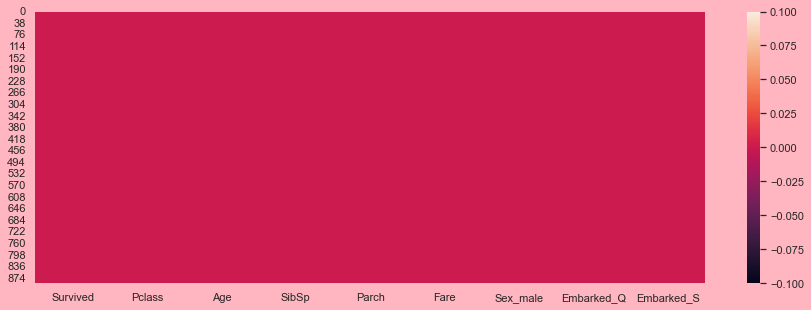

In [183]:
#analysis of the null values
plt.figure(figsize=(15,5))
sns.heatmap(df_encoding.isnull())

<AxesSubplot:>

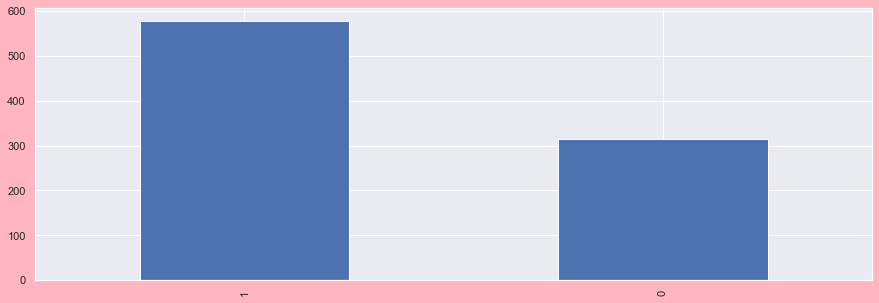

In [184]:
plt.figure(figsize=(15,5))
df_encoding['Sex_male'].value_counts().plot.bar()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

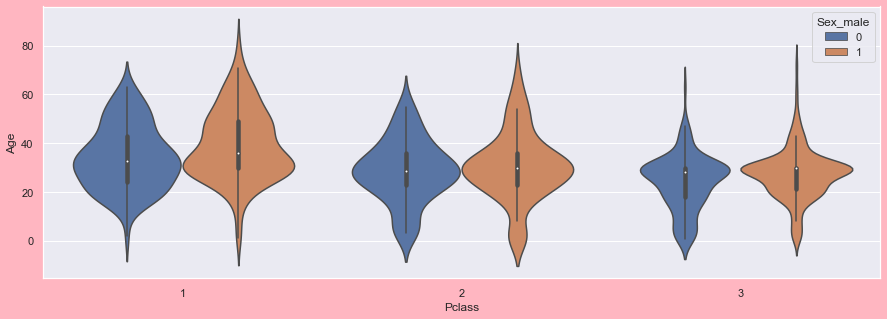

In [185]:
plt.figure(figsize=(15,5))
sns.violinplot(x=df_encoding['Pclass'], y=df_encoding['Age'], hue=df_encoding['Sex_male'])
#sns.violinplot(x=df_encoding['Survived'], y=df_encoding['Pclass'], axis=[1])
#sns.violinplot(x=df_encoding['Survived'], y=df_encoding['S'])

<AxesSubplot:xlabel='Pclass', ylabel='Sex_male'>

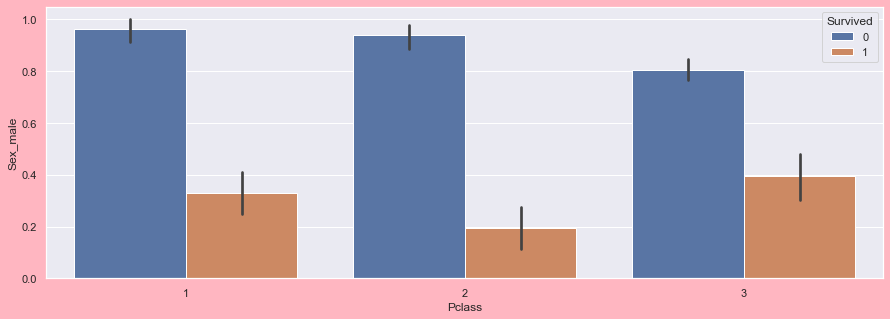

In [186]:
plt.figure(figsize=(15,5))
sns.barplot(x=df_encoding['Pclass'], y=df_encoding['Sex_male'], hue=df_encoding['Survived'])

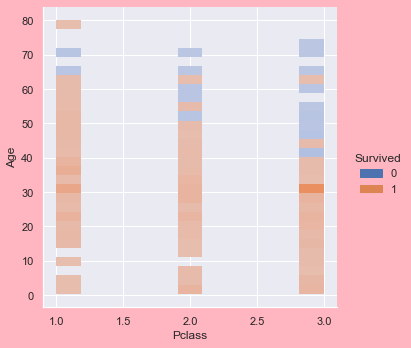

In [187]:
sns.displot(x=df_encoding['Pclass'], y=df_encoding['Age'], hue=df_encoding['Survived'])

### Conclude from our analysis from the Titanic dataset, that more males would have survived if most of them belonged to upper-class or age is below 18.


Saving the Exploratory data Analysis file in pickle module for storing purpose. 

use of pickle: can transform a complex object into a byte stream and vice-versa

In [190]:
with open(r'C:\Users\acer\Desktop\Exploratory-Data-Analysis\models\ExploratoryDataAnalysis.pkl','wb') as file:
    pickle.dump(df_encoding, file=file)

In [193]:
df=pickle.load(open(r'C:\Users\acer\Desktop\Exploratory-Data-Analysis\models\ExploratoryDataAnalysis.pkl','rb'))
df.tail(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
881,0,3,33.000000,0,0,7.8958,1,0,1
882,0,3,22.000000,0,0,10.5167,0,0,1
883,0,2,28.000000,0,0,10.5000,1,0,1
884,0,3,25.000000,0,0,7.0500,1,0,1
885,0,3,39.000000,0,5,29.1250,0,1,0
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0
890,0,3,32.000000,0,0,7.7500,1,1,0
